## Problem Statement:
Consider yourself to be Sam who is a data scientist. He has been approached by a retail car showroom to
help them segregate the cars into different clusters
## Tasks to be performed:
1. Building the k-means clustering algorithm:

    a. Start off by extracting the ‘mpg’, ‘disp’ & ‘hp’ columns from the ‘mtcars’ data.frame.
    Store the result in ‘car_features’
    
    b. Build the kmeans algorithm on top of ‘car_features’. Here, the number of clusters
    should be 3
    
    c. Bind the clustering vector to ‘car_features’.
    
    d. Extract observations belonging to individual clusters
    
   
2. On the same ‘car_features’dataset build a k-means algorithm, where the number of clusters is 5

    a. Bind the clustering vector to ‘car_features’
    
    b. Extract observations belonging to individual clusters
    
    

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cars-1.csv')

In [4]:
data.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
data.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [10]:
data['model'].unique()

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

In [11]:
car_features= data[['mpg','disp','hp']]

In [12]:
car_features

,mpg,disp,hp
0,21.0,160.0,110
1,21.0,160.0,110
2,22.8,108.0,93
3,21.4,258.0,110
4,18.7,360.0,175
5,18.1,225.0,105
6,14.3,360.0,245
7,24.4,146.7,62
8,22.8,140.8,95
9,19.2,167.6,123


## K-Means Clustering Algorithm

In [13]:
from sklearn.cluster import KMeans

In [14]:
#step-1 Initialise the class obj
model = KMeans(n_clusters=3)

In [15]:
#step-2 Train the model
model.fit(car_features)

C:\Users\91994\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91994\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
#step-3 predict the cluster labels
car_features['cluster'] = model.predict(car_features)

C:\Users\91994\AppData\Local\Temp\ipykernel_768\1063690820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features['cluster'] = model.predict(car_features)


In [17]:
car_features

,mpg,disp,hp,cluster
0,21.0,160.0,110,0
1,21.0,160.0,110,0
2,22.8,108.0,93,0
3,21.4,258.0,110,2
4,18.7,360.0,175,1
5,18.1,225.0,105,2
6,14.3,360.0,245,1
7,24.4,146.7,62,0
8,22.8,140.8,95,0
9,19.2,167.6,123,0


In [19]:
car_features['cluster'].unique()

array([0, 2, 1])

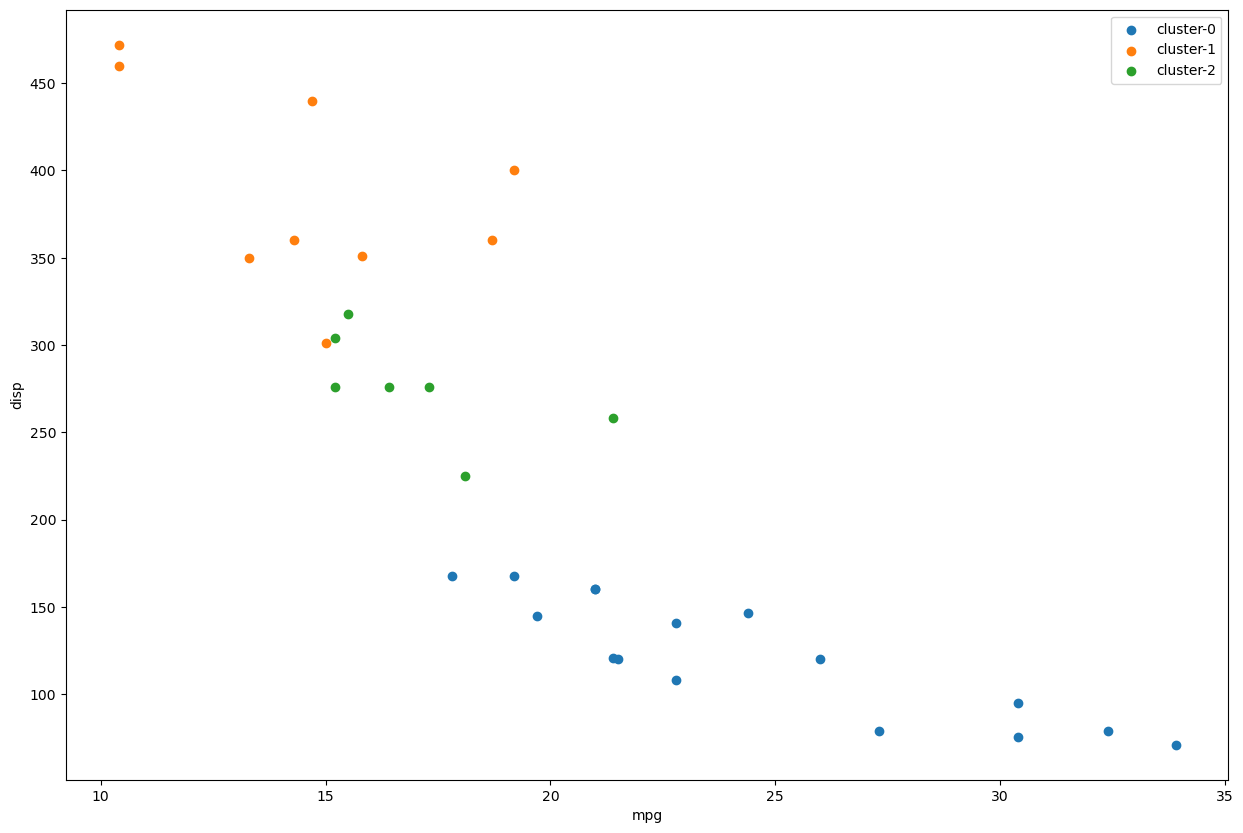

In [23]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.scatter(car_features[car_features['cluster']==0]['mpg'],car_features[car_features['cluster']==0]['disp'], label='cluster-0')
ax.scatter(car_features[car_features['cluster']==1]['mpg'],car_features[car_features['cluster']==1]['disp'], label='cluster-1')
ax.scatter(car_features[car_features['cluster']==2]['mpg'],car_features[car_features['cluster']==2]['disp'], label='cluster-2')
ax.set_xlabel("mpg")
ax.set_ylabel("disp")
ax.legend()

In [24]:
model1 = KMeans(n_clusters=5)
model1.fit(car_features)
car_features['clustering'] = model1.predict(car_features)

C:\Users\91994\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91994\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91994\AppData\Local\Temp\ipykernel_768\2034436377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features['clustering'] = model1.predict(car_features)


In [25]:
car_features

,mpg,disp,hp,cluster,clustering
0,21.0,160.0,110,0,0
1,21.0,160.0,110,0,0
2,22.8,108.0,93,0,3
3,21.4,258.0,110,2,1
4,18.7,360.0,175,1,1
5,18.1,225.0,105,2,0
6,14.3,360.0,245,1,4
7,24.4,146.7,62,0,3
8,22.8,140.8,95,0,3
9,19.2,167.6,123,0,0


In [26]:
car_features['clustering'].unique()

array([0, 3, 1, 4, 2])

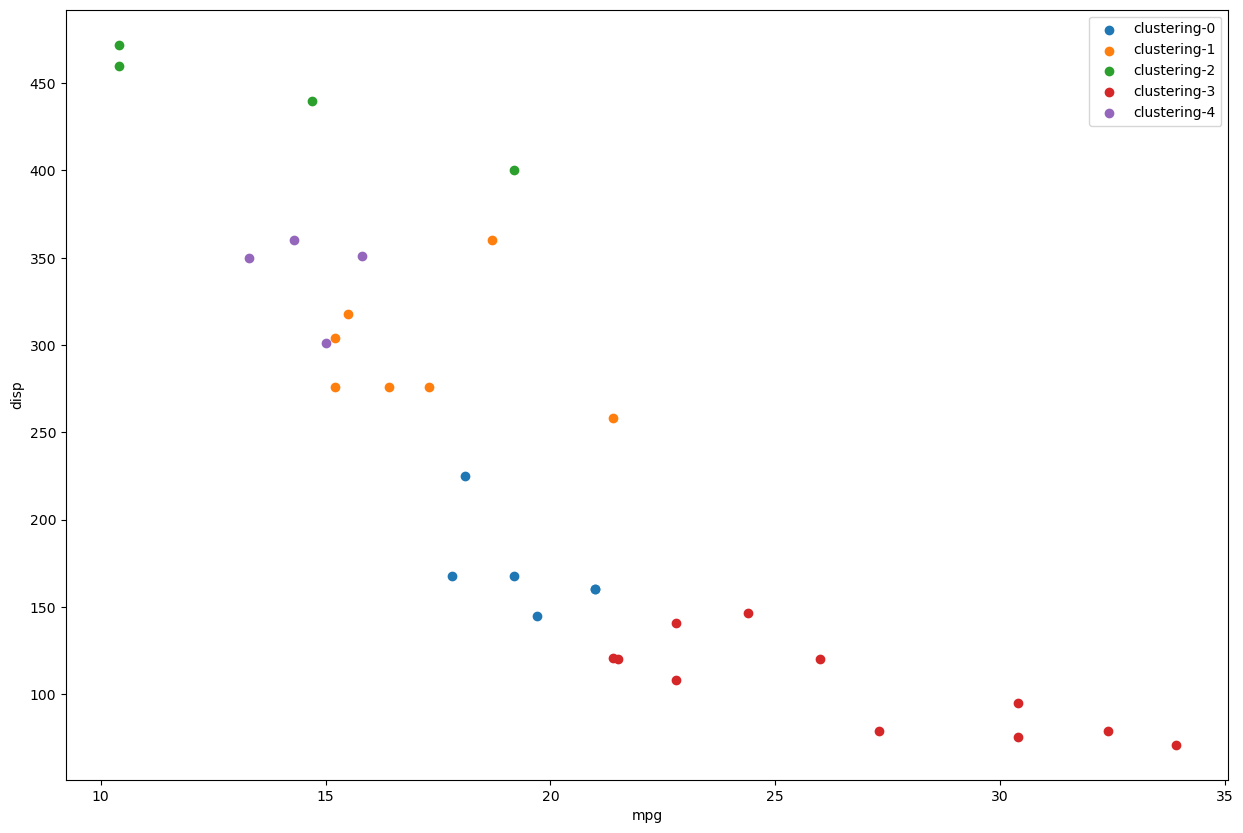

In [27]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.scatter(car_features[car_features['clustering']==0]['mpg'],car_features[car_features['clustering']==0]['disp'], label='clustering-0')
ax.scatter(car_features[car_features['clustering']==1]['mpg'],car_features[car_features['clustering']==1]['disp'], label='clustering-1')
ax.scatter(car_features[car_features['clustering']==2]['mpg'],car_features[car_features['clustering']==2]['disp'], label='clustering-2')
ax.scatter(car_features[car_features['clustering']==3]['mpg'],car_features[car_features['clustering']==3]['disp'], label='clustering-3')
ax.scatter(car_features[car_features['clustering']==4]['mpg'],car_features[car_features['clustering']==4]['disp'], label='clustering-4')
ax.set_xlabel("mpg")
ax.set_ylabel("disp")
ax.legend()